# Linear Regression

In [1]:
import generate_graph, generate_random_data
import numpy as np
import pandas as pd

In [2]:
# Setting Necessary Variables
b0_generator = 0.05
b1_generator = 0.85
max_deviation = 0.2
min_x_data = b0_generator + 0.05
max_x_data = 0.96 - 0.05

In [3]:
# Get DataFrame
line_parameter = np.array([b0_generator, b1_generator])
x_data, y_data = generate_random_data.get_linear_data(50, (min_x_data, max_x_data, max_deviation), line_parameter)
df = pd.DataFrame({"Intelligence": x_data, "Mating Probability": y_data})

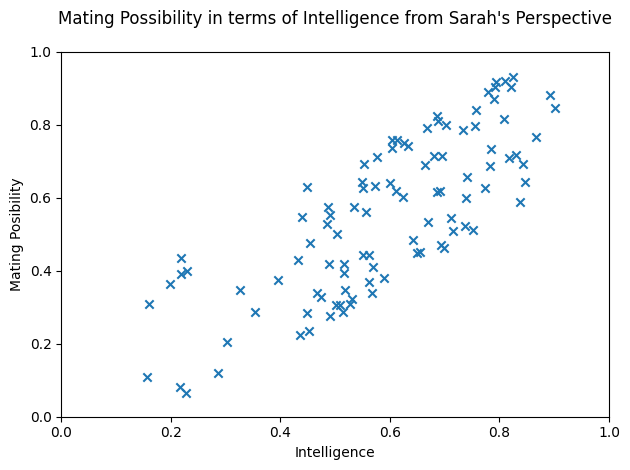

In [4]:
generate_graph.show_linear_data(df, line_parameter, hide_line=True)

Number of calculation:  676
0.9292578304704912x + 0.0032080207884856446


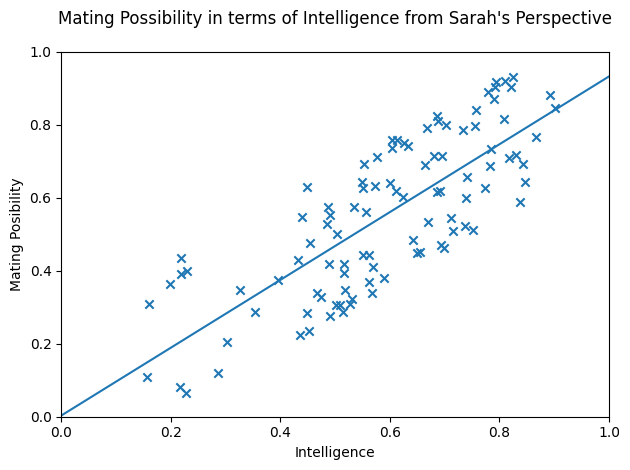

In [6]:
model_params = np.zeros((2,))
learning_rate = 0.01
n_calculation = 0
previous_costs = float('inf')
while True:
    b0, b1 = model_params
    prediction = b1*df["Intelligence"].values + b0
    errors = (prediction - df["Mating Probability"].values)
    current_costs = sum(errors ** 2)
    Xji = np.hstack([np.ones(len(df)).reshape(-1, 1), df["Intelligence"].values.reshape(-1, 1)])
    gradient = errors.reshape(1, -1) @ Xji

    if current_costs > previous_costs: break
    model_params = model_params - learning_rate * gradient
    model_params = model_params.flatten()
    previous_costs = current_costs
    n_calculation += 1

print("Number of calculation: ", n_calculation)
print(f"{model_params[1]}x + {model_params[0]}")
generate_graph.show_linear_data(df, model_params)

0.9292578988956591x + 0.0032079794175573495


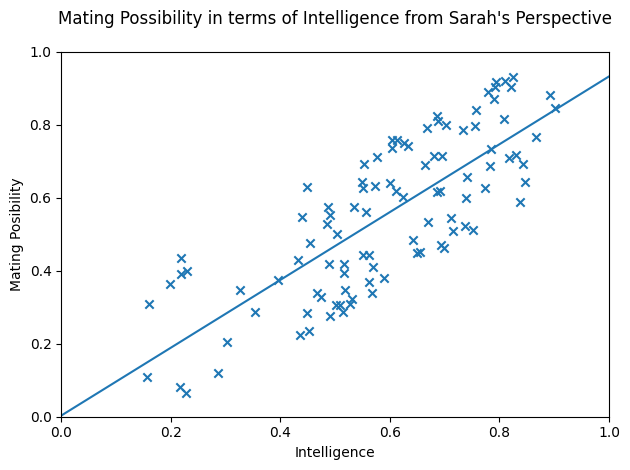

In [7]:
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression()
sklearn_model.fit(df[['Intelligence']], df['Mating Probability'])
sklearn_params = np.array([sklearn_model.intercept_, *sklearn_model.coef_])
print(f"{sklearn_params[1]}x + {sklearn_params[0]}")
generate_graph.show_linear_data(df, sklearn_params)